# Example of loading shear/CAPE,TCWV over S Asia and plotting the result

* ERA5 data but interpolated in time to on the half hour (to match MCS tracking)
* Each hour of 2020 present.

In [1]:
import datetime as dt
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
year = 2020
month = 1
day = 1
h = 0

e5time = pd.Timestamp(year, month, day, h, 0)

In [3]:
outdir = Path('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output') / 'regional_ERA5_data' / 'east_asia'/ f'{e5time.year}' / f'{e5time.month:02d}' / f'{e5time.day:02d}'
filename = f'ecmwf-era5_oper_an_sfc_{e5time.year}{e5time.month:02d}{e5time.day:02d}{e5time.hour:02d}30.shear.east_asia.nc'
outpath = outdir / filename
(outpath, outpath.exists())

(PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/regional_ERA5_data/east_asia/2020/01/01/ecmwf-era5_oper_an_sfc_202001010030.shear.east_asia.nc'),
 True)

In [4]:
ds_shear = xr.open_dataset(outpath)
ds_shear

<xarray.Dataset>
Dimensions:      (shear_level: 3, latitude: 221, longitude: 281)
Coordinates:
  * shear_level  (shear_level) int64 0 1 2
  * latitude     (latitude) float32 55.0 54.75 54.5 54.25 ... 0.75 0.5 0.25 0.0
  * longitude    (longitude) float32 95.0 95.25 95.5 95.75 ... 164.5 164.8 165.0
    time         datetime64[ns] ...
Data variables:
    shear        (shear_level, latitude, longitude) float64 ...
Attributes:
    shear_level 0:  LLS: shear between surf and 800 hPa (ERA5 136-111)
    shear_level 1:  Low-to-mid: shear between 800 and 600 hPa (ERA5 111-101)
    shear_level 2:  MLS: shear between surf and 600 hPa (ERA5 136-101)

In [5]:
output_time = pd.Timestamp(ds_shear.time.values.item())

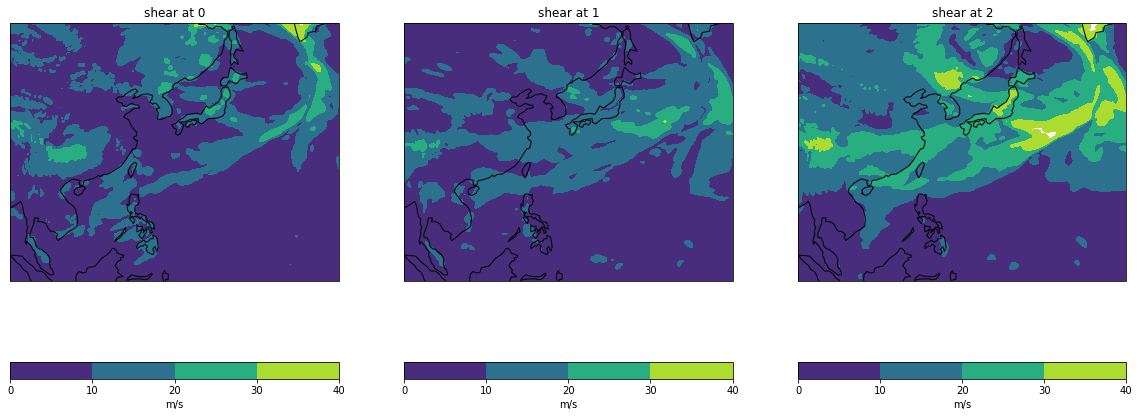

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(20, 10)

for ax, shear_level in zip((ax1, ax2, ax3), [0, 1, 2]):
    
    im = ax.contourf(ds_shear.longitude, ds_shear.latitude, ds_shear.shear.sel(shear_level=shear_level), levels=np.linspace(0, 40, 5))
    ax.coastlines()

    ax.set_title(f'shear at {shear_level}')
    plt.colorbar(im, ax=ax, orientation='horizontal', label='m/s')



In [19]:
start = pd.Timestamp(2020, 1, 1, 0, 30)
# Switch to 10 days for loading of data.
end = start + pd.DateOffset(days=1) - pd.Timedelta(hours=1)
time_jan = pd.date_range(start, end, freq='H')
time_jan

DatetimeIndex(['2020-01-01 00:30:00', '2020-01-01 01:30:00',
               '2020-01-01 02:30:00', '2020-01-01 03:30:00',
               '2020-01-01 04:30:00', '2020-01-01 05:30:00',
               '2020-01-01 06:30:00', '2020-01-01 07:30:00',
               '2020-01-01 08:30:00', '2020-01-01 09:30:00',
               '2020-01-01 10:30:00', '2020-01-01 11:30:00',
               '2020-01-01 12:30:00', '2020-01-01 13:30:00',
               '2020-01-01 14:30:00', '2020-01-01 15:30:00',
               '2020-01-01 16:30:00', '2020-01-01 17:30:00',
               '2020-01-01 18:30:00', '2020-01-01 19:30:00',
               '2020-01-01 20:30:00', '2020-01-01 21:30:00',
               '2020-01-01 22:30:00', '2020-01-01 23:30:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
paths = [(Path('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output') / 
          'regional_ERA5_data' / 'east_asia'/ 
          f'{t.year}' / f'{t.month:02d}' / f'{t.day:02d}' /
          f'ecmwf-era5_oper_an_sfc_{t.year}{t.month:02d}{t.day:02d}{t.hour:02d}30.east_asia.nc')
         for t in time_jan]
paths[-5:]
        

[PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/regional_ERA5_data/east_asia/2020/01/01/ecmwf-era5_oper_an_sfc_202001011930.east_asia.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/regional_ERA5_data/east_asia/2020/01/01/ecmwf-era5_oper_an_sfc_202001012030.east_asia.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/regional_ERA5_data/east_asia/2020/01/01/ecmwf-era5_oper_an_sfc_202001012130.east_asia.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/regional_ERA5_data/east_asia/2020/01/01/ecmwf-era5_oper_an_sfc_202001012230.east_asia.nc'),
 PosixPath('/gws/nopw/j04/mcs_prime/mmuetz/data/mcs_prime_output/regional_ERA5_data/east_asia/2020/01/01/ecmwf-era5_oper_an_sfc_202001012330.east_asia.nc')]

In [21]:
# %%timeit -n1 -r1
ds = xr.open_mfdataset(paths, concat_dim='time', combine='nested')

In [22]:
ds.load()

<xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 221, time: 24)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 164.5 164.8 165.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2020-01-01T00:30:00 ... 2020-01-01T23:30:00
Data variables:
    cape       (time, latitude, longitude) float64 1.328 1.181 ... 222.2 249.6
    tcwv       (time, latitude, longitude) float64 5.247 5.281 ... 57.98 57.87
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-31 12:30:33 GMT by grib_to_netcdf-2.14.0: grib_to_n...

In [11]:
# ds.mean(dim='time').values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:    (longitude: 281, latitude: 221)
Coordinates:
  * longitude  (longitude) float32 95.0 95.25 95.5 95.75 ... 164.5 164.8 165.0
  * latitude   (latitude) float32 55.0 54.75 54.5 54.25 ... 0.75 0.5 0.25 0.0
Data variables:
    cape       (latitude, longitude) float64 dask.array<chunksize=(221, 281), meta=np.ndarray>
    tcwv       (latitude, longitude) float64 dask.array<chunksize=(221, 281), meta=np.ndarray>>

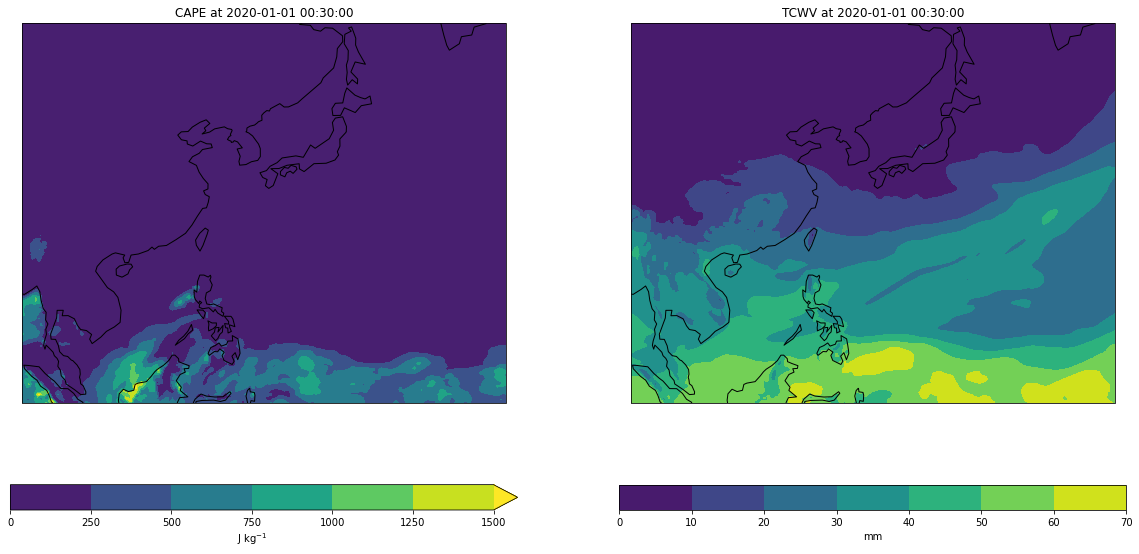

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': ccrs.PlateCarree()})
fig.set_size_inches(20, 10)
im1 = ax1.contourf(ds.longitude, ds.latitude, ds.mean(dim='time').cape, extend='max')
ax1.coastlines()
im2 = ax2.contourf(ds.longitude, ds.latitude, ds.mean(dim='time').tcwv)
ax2.coastlines()

ax1.set_title(f'CAPE at {output_time}')
ax2.set_title(f'TCWV at {output_time}')
plt.colorbar(im1, ax=ax1, orientation='horizontal', label='J kg$^{-1}$')
plt.colorbar(im2, ax=ax2, orientation='horizontal', label='mm');